# Analysis

This notebook will be useful on small data sets.

In [1]:
import weibull
%matplotlib inline

print('weibull version:', weibull.__version__)

weibull version: 0.0.13


Create the failure times array and the analysis object.  When the analysis is initialized with data, it creates values for the shape parameter, $\beta$, and the scale parameter, $\eta$.

In [2]:
failure_times = [
    10197.8, 3349.0, 15318.6, 710.7, 20683.2, 
    6976.5, 2590.7, 11351.7, 10177.0, 3738.4
]

suspensions = [False, False, False, False, True, 
               False, False, False, False, False]

analysis = weibull.Analysis(failure_times, suspensions, unit='hour')
analysis.fit()

print(f'beta: {analysis.beta:.02f}\neta: {analysis.eta:.1f}')

beta: 1.09
eta: 9855.3


Lets check out the probability plot!

c:\program files (x86)\python36-32\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


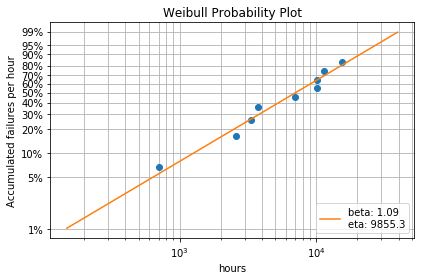

In [3]:
analysis.probplot()

Looks pretty decent in this case.  For completeness, we should look at the fit tests.

In [4]:
analysis.stats

fit method          linear regression
p_value                   1.81369e-06
r_squared                    0.967554
confidence                        0.9
beta lower limit             0.685677
beta nominal                  1.08978
beta upper limit              1.73205
eta lower limit                5853.8
eta nominal                    9855.3
eta upper limit               16592.1
mean life                     9539.16
median life                    7040.6
b10 life                      1249.87
dtype: object

# B-Life

Lets take a look at how easy it is to calculate a B-life.  The B10 life and B50 life are already calculated in `analysis.stats` for convenience b/c so many customers are interested in these values.  What if you needed a B2 life?

In [7]:
analysis.b(2)

274.59436250145313

# Plotting

The standard suite of plots are included...

c:\program files (x86)\python36-32\lib\site-packages\matplotlib\figure.py:2022: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


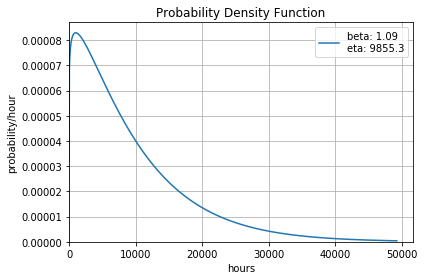

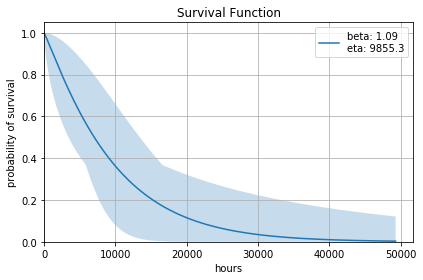

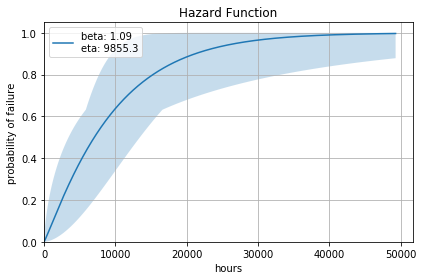

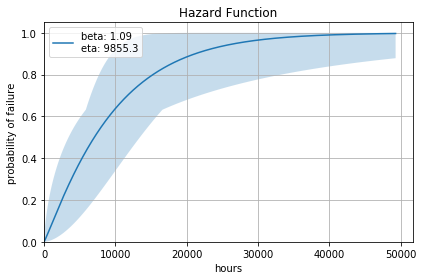

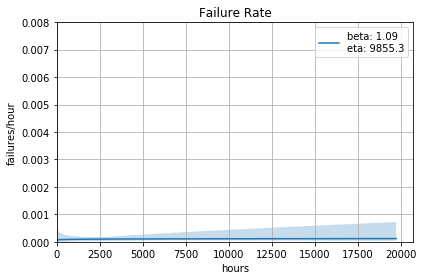

In [5]:
analysis.pdf()
analysis.sf()
analysis.hazard()
analysis.cdf()
analysis.fr()

I realize that there is some overlap in the plots - such as `cdf` and `hazard` - but having all of the functions defined makes it easier for the maximum number of user.